# Transmutation of matter via colliding waves by Hayward
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  December 30, 2021

We work with the colliding plane wave metric of Szekeres (see notebook on 1972 paper) and set both Q and W = 0 giving the metric below.  Equations in this paper are not numbered, and we derive the vacuum field equations.  Time permitting we will go back and define a stress energy tensor to get the full set of equations.

https://iopscience.iop.org/article/10.1088/0264-9381/7/2/002

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
u,v,x,y,du,dv,dx,dy = symbols( 'u v x y du dv dx dy' ) 

In [4]:
M = Function('M')(u,v)
M

In [5]:
P = Function('P')(u,v)
P

In [6]:
variables = Matrix( [u,v,x,y] )
variables

⎡u⎤
⎢ ⎥
⎢v⎥
⎢ ⎥
⎢x⎥
⎢ ⎥
⎣y⎦

In [7]:
differentials = Matrix( [du,dv,dx,dy] ) 
differentials

⎡du⎤
⎢  ⎥
⎢dv⎥
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎣dy⎦

In [9]:
lineElement = expand( 2*exp(-M)*du*dv - exp(-P)*(dx**2+dy**2) ) 
lineElement

In [10]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡            -M(u, v)                        ⎤
⎢    0      ℯ              0           0     ⎥
⎢                                            ⎥
⎢ -M(u, v)                                   ⎥
⎢ℯ              0          0           0     ⎥
⎢                                            ⎥
⎢                        -P(u, v)            ⎥
⎢    0          0      -ℯ              0     ⎥
⎢                                            ⎥
⎢                                    -P(u, v)⎥
⎣    0          0          0       -ℯ        ⎦

In [11]:
import sympy

In [12]:
m = sympy.Array(g)
m

⎡            -M(u, v)                        ⎤
⎢    0      ℯ              0           0     ⎥
⎢                                            ⎥
⎢ -M(u, v)                                   ⎥
⎢ℯ              0          0           0     ⎥
⎢                                            ⎥
⎢                        -P(u, v)            ⎥
⎢    0          0      -ℯ              0     ⎥
⎢                                            ⎥
⎢                                    -P(u, v)⎥
⎣    0          0          0       -ℯ        ⎦

In [13]:
from einsteinpy.symbolic import *

In [14]:
syms = sympy.symbols("u v x y")
u,v,x,y = syms

In [15]:
metric = MetricTensor(m,syms)

In [16]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡                                                                                           
⎢⎡ ∂                                                                                 ⎤  ⎡0  
⎢⎢-──(M(u, v))  0                 0                                 0                ⎥  ⎢   
⎢⎢ ∂u                                                                                ⎥  ⎢   
⎢⎢                                                                                   ⎥  ⎢0  
⎢⎢     0        0                 0                                 0                ⎥  ⎢   
⎢⎢                                                                                   ⎥  ⎢   
⎢⎢                   M(u, v)  -P(u, v) ∂                                             ⎥  ⎢   
⎢⎢                 -ℯ       ⋅ℯ        ⋅──(P(u, v))                                   ⎥  ⎢   
⎢⎢                                     ∂v                                            ⎥  ⎢   
⎢⎢     0        0  ────────────────────────────────                 0 

In [17]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                         2                                                 
⎢                            ⎛∂          ⎞                      ∂           ∂               
⎢                            ⎜──(P(u, v))⎟      2               ──(P(u, v))⋅──(P(u, v))     
⎢  ∂           ∂             ⎝∂u         ⎠     ∂                ∂u          ∂v              
⎢  ──(M(u, v))⋅──(P(u, v)) - ────────────── + ───(P(u, v))    - ─────────────────────── + ──
⎢  ∂u          ∂u                  2            2                          2              ∂v
⎢                                             ∂u                                            
⎢                                                                                           
⎢                                                                                           
⎢  ∂           ∂                                                                          ⎛∂
⎢  ──(P(u, v))⋅──(P(u, v))      2                2                    

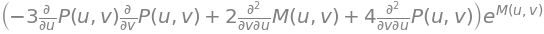

In [18]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [19]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                       2                                                   
⎢                          ⎛∂          ⎞                                                    
⎢                          ⎜──(P(u, v))⎟      2                                             
⎢∂           ∂             ⎝∂u         ⎠     ∂                     ∂           ∂            
⎢──(M(u, v))⋅──(P(u, v)) - ────────────── + ───(P(u, v))       1.0⋅──(P(u, v))⋅──(P(u, v)) -
⎢∂u          ∂u                  2            2                    ∂u          ∂v           
⎢                                           ∂u                                              
⎢                                                                                           
⎢                                                                                           
⎢                                                                                   ⎛∂      
⎢                                      2                              

In [20]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                              ⎡                    2       
⎢                                                              ⎢                   ∂        
⎢                                                              ⎢       0         ─────(M(u, 
⎢                                                              ⎢                 ∂v ∂u      
⎢                                                              ⎢      

In [21]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                           ⎡0  0  0  0⎤                                    
⎢                                           ⎢          ⎥                                    
⎢                                           ⎢0  0  0  0⎥                                    
⎢                                           ⎢          ⎥                                    
⎢                                           ⎢0  0  0  0⎥                                    
⎢                                           ⎢          ⎥              

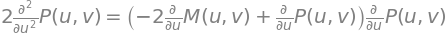

In [39]:
fieldEquation1 = Eq(2*diff(P,u,u), 2*solve( einst.tensor()[0,0] , diff(P,u,u) )[0] )
fieldEquation1

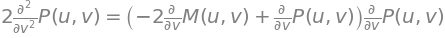

In [40]:
fieldEquation2 = Eq(2*diff(P,v,v), 2*solve( einst.tensor()[1,1] , diff(P,v,v) )[0] )
fieldEquation2

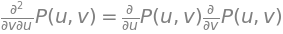

In [41]:
fieldEquation3 = Eq(diff(P,u,v) , solve( einst.tensor()[0,1] , diff(P,u,v) )[0] ) 
fieldEquation3 

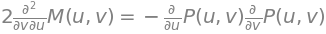

In [47]:
fieldEquation4 =Eq( 2* diff(M,u,v) ,2 * solve( einst.tensor()[2,2].args[1].args[1] , diff(M,u,v) )[0] ).subs(fieldEquation3.args[0],fieldEquation3.args[1])
fieldEquation4

In [49]:
vacuumFieldEquations = Matrix([fieldEquation1,fieldEquation2,fieldEquation3,fieldEquation4])
vacuumFieldEquations

⎡    2                                                       ⎤
⎢   ∂             ⎛    ∂             ∂          ⎞ ∂          ⎥
⎢2⋅───(P(u, v)) = ⎜- 2⋅──(M(u, v)) + ──(P(u, v))⎟⋅──(P(u, v))⎥
⎢    2            ⎝    ∂u            ∂u         ⎠ ∂u         ⎥
⎢  ∂u                                                        ⎥
⎢                                                            ⎥
⎢    2                                                       ⎥
⎢   ∂             ⎛    ∂             ∂          ⎞ ∂          ⎥
⎢2⋅───(P(u, v)) = ⎜- 2⋅──(M(u, v)) + ──(P(u, v))⎟⋅──(P(u, v))⎥
⎢    2            ⎝    ∂v            ∂v         ⎠ ∂v         ⎥
⎢  ∂v                                                        ⎥
⎢                                                            ⎥
⎢             2                                              ⎥
⎢            ∂              ∂           ∂                    ⎥
⎢          ─────(P(u, v)) = ──(P(u, v))⋅──(P(u, v))          ⎥
⎢          ∂v ∂u            ∂u          ∂v             